<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/multilabel_cnn%2Cbilstm%2Ccnn%2Bbilstm_glove_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

# Importing required libraries
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

from keras.layers import Embedding

from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Model
from keras import regularizers

# gensim
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [2]:

    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

stop_words =  set(open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bd_stopword.txt').read().split())
stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(text):
    return stop_words.sub(" ", text)

def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)

def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Za-z0-9]', flags=re.I)
    return pattern.sub(r'', text)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/Hostility_dataset - Hostility_Dataset_main_suffeld.csv")
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1
10534,629,হ্লার পৌ হ্লা,1,0,1,0,0,0
10535,2913,NaN,1,1,0,1,0,0


In [5]:
# Generate a boolean mask for the entire dataframe
mask = df.isnull()

# Count the number of null values in each column
null_counts = mask.sum()

# Print the results
print(null_counts)

id                     0
Text                   2
Hostile/Non-Hostile    0
offensive              0
Hate speech            0
threat                 0
defamation             0
sarcasm                0
dtype: int64


In [6]:
  # Clean the text
# df['Text'] = df.Text.apply(lambda x : cleantxt(x))

df['Text'] = df['Text'].astype(str)
data_raw = df 
data_raw['Text'] = data_raw['Text'].apply(removeStopWords)
data_raw['Text'] = data_raw['Text'].apply(rem_emoticons)
data_raw['Text'] = data_raw['Text'].apply(rem_special_characters)
data_raw['Text'] = data_raw['Text'].apply(rem_non_bangla_characters)
df = data_raw

# separate explanatory and dependent variables


In [7]:
X = df.iloc[:,1]
y = df.iloc[:,2:]

In [8]:
y


,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,1,1,0,0,0
1,0,0,0,0,0,0
2,1,1,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
10532,1,1,0,0,0,1
10533,1,1,0,0,0,1
10534,1,0,1,0,0,0
10535,1,1,0,1,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [14]:
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape,X_test.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape,y_test.shape)

Shape of X train and X validation tensor: (8429,) (1054,) (1054,)
Shape of label train and validation tensor: (8429, 6) (1054, 6) (1054, 6)


In [15]:
X_train    

704                      চদানির মাগিরে আইনের আওতায় আনতে  
1012                             আফ্রিদি ভাইয়া   ধন্যবাদ
925                         দেশে  মানুষ পান    খানকিদের  
940               এসব পরছেন  দেশে  পোশাকের অভাব পরছে নাকি
8859       যাক অবশেষে  নামটা দিয়ে  লাদেশ ভালো  নায়ক বেড়  
                              ...                        
9785    সাউথে  প্রসান্ত নীলরাজা মৌলী   আমাদেরও  রায়হান...
7763    ভদ্রতা কাহা  ওনা দেখলে  অনুসরণ     প্রিয় মানুষ...
5218    জামাতের মি  পুলিশের সন্ত্রাসী হামলা পুলিশ বর্ত...
1346     চা  খুনের বিচার এইভাবে করুক  দেশে সরকার  হইতো...
3582                                     ঔ মাগির ফাসি চাই
Name: Text, Length: 8429, dtype: object

In [16]:
print(X_test)

3522        অমানুষ  দল  মানুষ থা   ছেলে কুপিয়ে মারছে  ব...
10029    সী খানকি  লেংটা  বে মা রামচন্দ্রের সামনে চুদে  সে
1420       ছোট বেলা   বক্ত   প্রাথমিক বিদ্যালয়ের ভর্তি ...
5829     তো বলছি কাটা বাচ্চা  সসি  আরব  জলে ভে ভারতে ধু...
3602                                        কঠিন বিচার চাই
                               ...                        
5830     তো সামনে পেলে শালী চুদে  গাড় ফাটিয়ে দিবো রেন্ড...
4476     খানকির বচ্চা   সারা ওয়ার্ল্ড জুড়ে আছি   দেখিস ...
7067     ফারাক্কার  গেট খুলে দিলে সমস্যা   মতিয়া বাস্তব...
5711              লিখতে জানস  কইত্তন কপি মারছত হালারপোয়ালা
6295                      মনে   পোলি রোগে আক্রান্ত হয়েছেন
Name: Text, Length: 1054, dtype: object


### 2. Tokenize text of the training data with keras text preprocessing functions ###

In [23]:
# # Adding list of Bad words to tokanizer
# # bad_words = pd.read_csv("../input/bad-words/bad_words.csv")
# bad_words =  list(['word'])

In [24]:
# Set Maximum number of words to be embedded
NUM_WORDS = 30000

# Define/Load Tokenize text function
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)

# Fit the function on the text

tokenizer.fit_on_texts(X_train)

# Count number of unique tokens
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 18252 unique tokens.


In [25]:
# n = 0
# temp_bw = bad_words
# for word, i in word_index.items():
#     if word in bad_words:
#         temp_bw.remove(word)
#         n = n+1
#     if i > (NUM_WORDS-num_badwords+n):
#         for bw in temp_bw:
#             tokenizer.word_index[bw] = i
#             i=i+1
#         break           

In [26]:
# Convert train and val to sequence
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid=tokenizer.texts_to_sequences(X_val)

In [27]:
from keras.utils import pad_sequences
X_train = pad_sequences(sequences_train,maxlen=100)
X_val = pad_sequences(sequences_valid,maxlen=100)

# Convert target to array
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

# Printing shape
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (8429, 100) (1054, 100)
Shape of label train and validation tensor: (8429, 6) (1054, 6)


# word embedding

In [28]:
word_vectors = dict()

# load the whole embedding into memory
f = open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bn_glove.39M.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_vectors[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(word_vectors))

Loaded 178153 word vectors.


In [29]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,(NUM_WORDS))

embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))


for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)
        if word in bad_words:
            vec = word_vectors['']
        embedding_matrix[i]=vec

del(word_vectors)

In [30]:
# Dfine Embedding function using the embedding_matrix
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

In [31]:
del(embedding_matrix)

# Build network and train it untill validation loss reduces (EarlyStopping)

In [66]:
sequence_length = X_train.shape[1]
filter_sizes = [3,4]
num_filters = 100
drop = 0.4

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((2*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
conc = Dense(64)(dropout)
output = Dense(units=6, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(conc)

# this creates a model that includes
model = Model(inputs, output)

In [67]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     5475900     ['input_5[0][0]']                
                                                                                                  
 reshape_2 (Reshape)            (None, 100, 300, 1)  0           ['embedding[1][0]']              
                                                                                                  
 conv2d_2 (Conv2D)              (None, 98, 1, 100)   90100       ['reshape_2[0][0]']              
                                                                                            

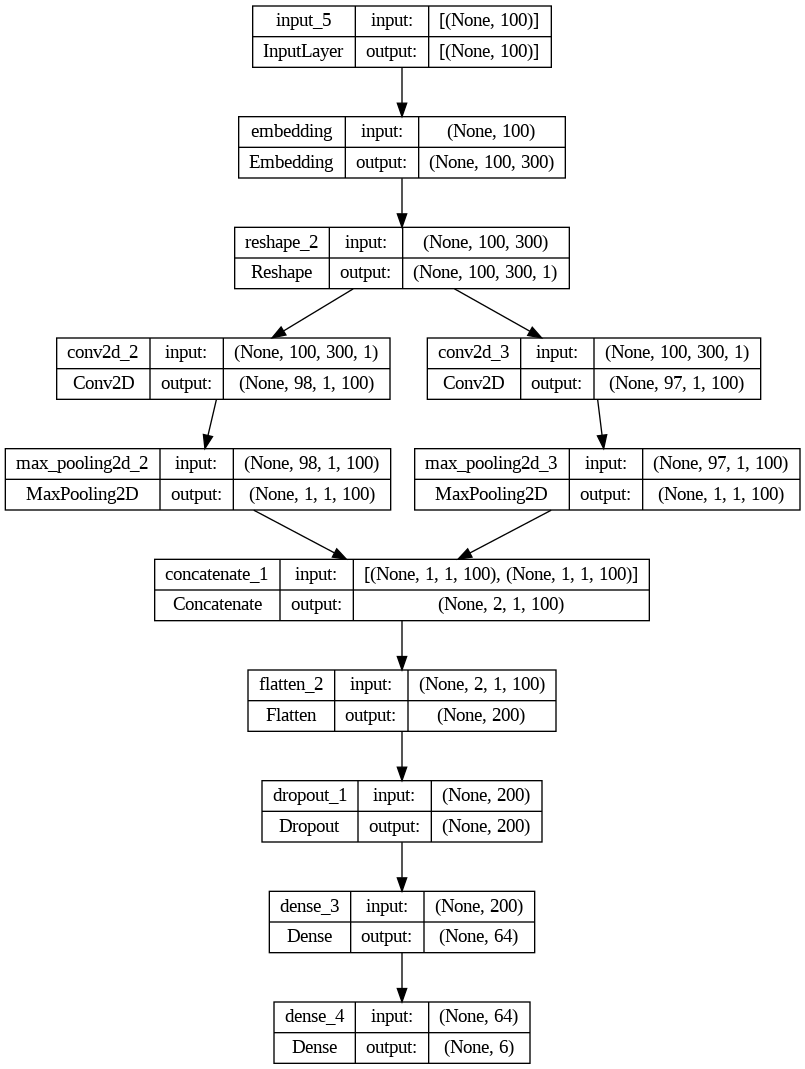

In [68]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [35]:
# Compiling Model using optimizer
# opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_accuracy'), EarlyStopping(patience= 10), ModelCheckpoint(filepath='/content/model-CNN-glove.h5', save_best_only=True)]
# hist_adam = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_val, y_val),callbacks=callbacks)
  # starts training

In [36]:
hist=     model.fit(X_train, y_train,batch_size= 128, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)  

Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 0.6245 - acc: 0.9414

66/66 [==============================] - 59s 864ms/step - loss: 0.6245 - acc: 0.9414 - val_loss: 0.5607 - val_acc: 0.9383
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 0.5248 - acc: 0.9192

66/66 [==============================] - 50s 755ms/step - loss: 0.5248 - acc: 0.9192 - val_loss: 0.5095 - val_acc: 0.9127
Epoch 3/10
66/66 [==============================] - ETA: 0s - loss: 0.4783 - acc: 0.8733

66/66 [==============================] - 82s 1s/step - loss: 0.4783 - acc: 0.8733 - val_loss: 0.4879 - val_acc: 0.8776
Epoch 4/10
66/66 [==============================] - ETA: 0s - loss: 0.4407 - acc: 0.8354

66/66 [==============================] - 62s 941ms/step - loss: 0.4407 - acc: 0.8354 - val_loss: 0.4788 - val_acc: 0.8065
Epoch 5/10
66/66 [==============================] - ETA: 0s - loss: 0.4161 - acc: 0.8082

66/66 [==============================] - 59s 905ms/step - loss: 0.4161 - acc: 0.8082 - val_loss: 0.4778 - val_acc: 0.8027
Epoch 6/10
66/66 [==============================] - ETA: 0s - loss: 0.3927 - acc: 0.7917

66/66 [==============================] - 63s 962ms/step - loss: 0.3927 - acc: 0.7917 - val_loss: 0.4820 - val_acc: 0.8093
Epoch 7/10
66/66 [==============================] - ETA: 0s - loss: 0.3726 - acc: 0.7817

66/66 [==============================] - 57s 860ms/step - loss: 0.3726 - acc: 0.7817 - val_loss: 0.4912 - val_acc: 0.7827
Epoch 8/10
66/66 [==============================] - ETA: 0s - loss: 0.3573 - acc: 0.7698

66/66 [==============================] - 49s 748ms/step - loss: 0.3573 - acc: 0.7698 - val_loss: 0.5019 - val_acc: 0.7694
Epoch 9/10
66/66 [==============================] - ETA: 0s - loss: 0.3413 - acc: 0.7655

66/66 [==============================] - 52s 783ms/step - loss: 0.3413 - acc: 0.7655 - val_loss: 0.5115 - val_acc: 0.8074
Epoch 10/10
66/66 [==============================] - ETA: 0s - loss: 0.3260 - acc: 0.7561

66/66 [==============================] - 51s 779ms/step - loss: 0.3260 - acc: 0.7561 - val_loss: 0.5270 - val_acc: 0.7827


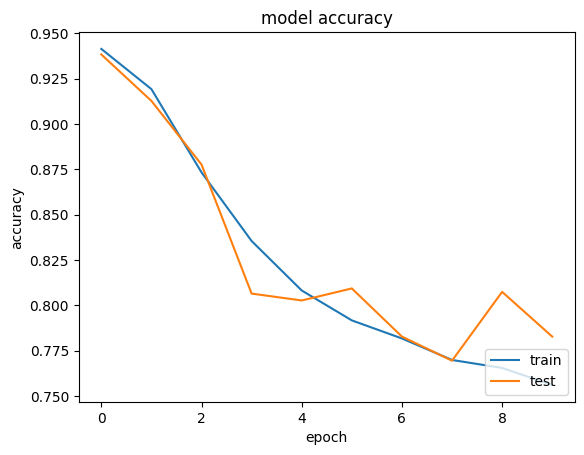

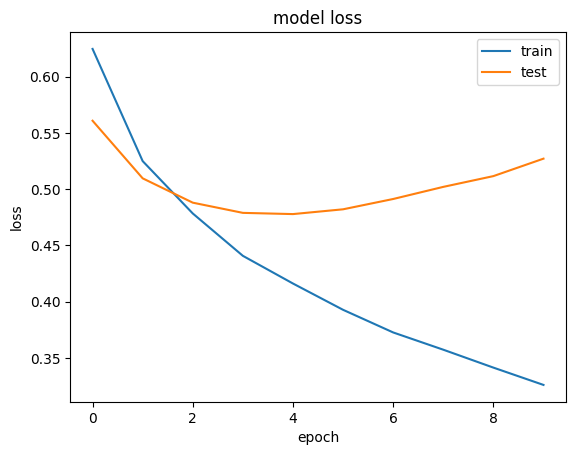

In [37]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

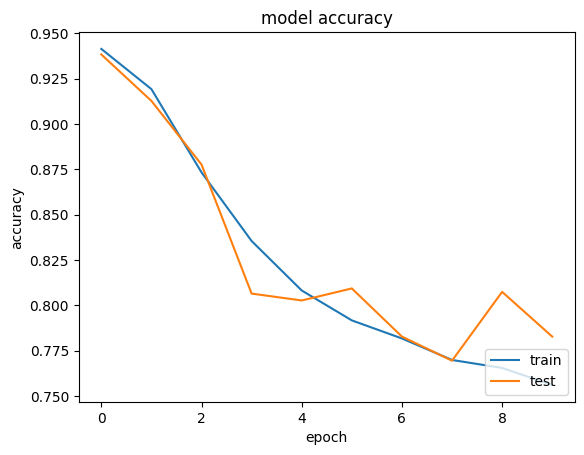

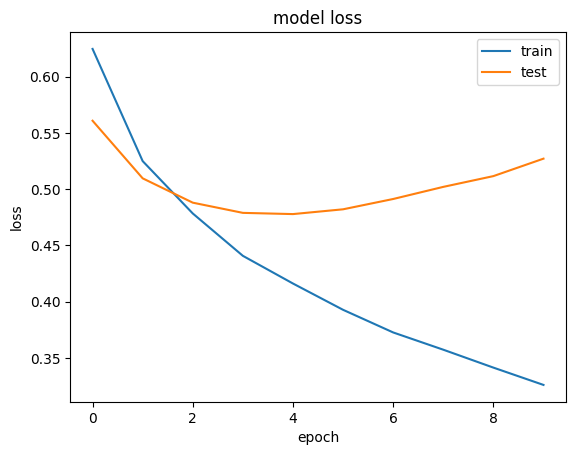

In [38]:
#copy
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [39]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [40]:
# Creating empty prediction array
col =['Hostile/Non-Hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

33/33 [==============================] - 1s 31ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [41]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

<ipython-input-41-0bf6ad0b081c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


array([[1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.89947781 0.76492537 0.48684211 0.53488372 0.34337349 0.43055556]
[0.94642857 0.60650888 0.46835443 0.17164179 0.25446429 0.13716814]
[0.92235609 0.67656766 0.47741935 0.25988701 0.29230769 0.20805369]


In [48]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix( y_pred,y_test)
cm

array([[[249,  39],
        [ 77, 689]],

       [[653, 133],
        [ 63, 205]],

       [[700, 126],
        [117, 111]],

       [[900, 111],
        [ 20,  23]],

       [[721, 167],
        [109,  57]],

       [[787, 195],
        [ 41,  31]]])

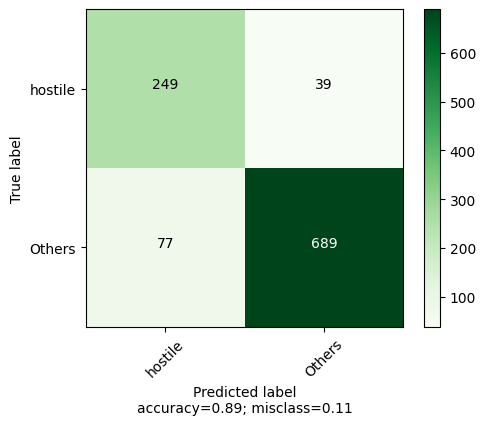

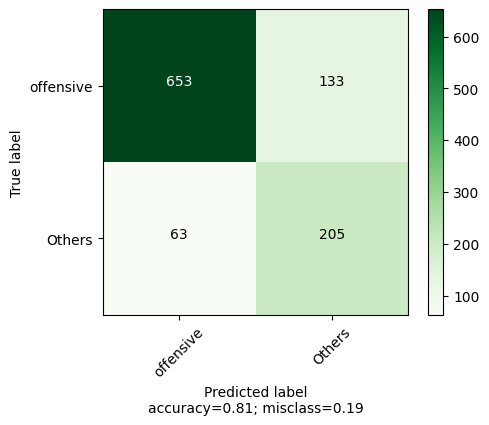

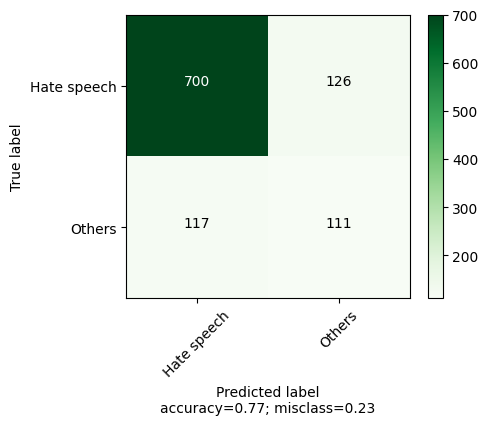

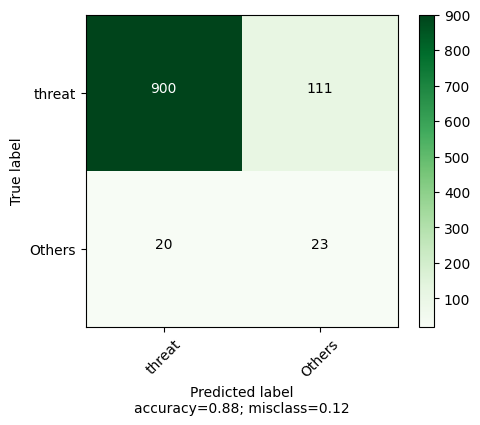

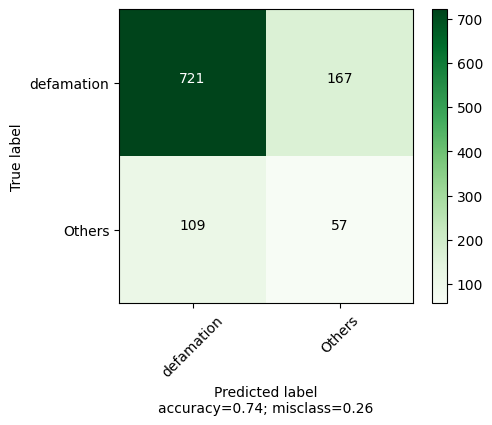

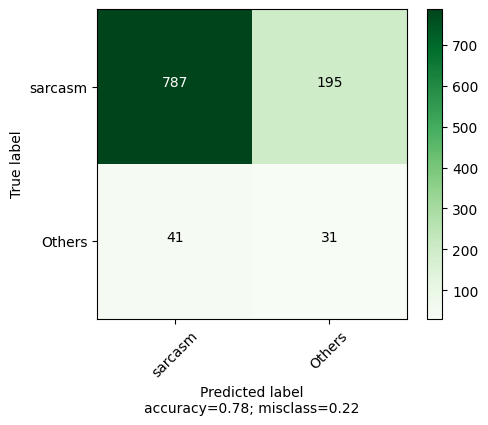

In [51]:
import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()
    
labels = ["hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]
for i in range(6):
    plot_confusion_matrix(cm=np.array(cm[i]), 
                      normalize    = False,
                      target_names = [labels[i],'Others'],
                      title        = "")

In [52]:
from sklearn.metrics import classification_report
import numpy as np

labels =["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.90      0.95      0.92       728
          offensive       0.76      0.61      0.68       338
        Hate speech       0.49      0.47      0.48       237
             threat       0.53      0.17      0.26       134
         defamation       0.34      0.25      0.29       224
            sarcasm       0.43      0.14      0.21       226

          micro avg       0.72      0.59      0.65      1887
          macro avg       0.58      0.43      0.47      1887
       weighted avg       0.68      0.59      0.62      1887
        samples avg       0.55      0.42      0.45      1887



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Bi LSTM**

In [69]:

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [94]:
sequence_length = X_train.shape[1]
num_classes = 6
drop = 0.4
lstm_units = 32

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
lstm = Bidirectional(LSTM(units=lstm_units, dropout=drop, recurrent_dropout=drop))(embedding)
dense = Dense(64)(lstm)
output = Dense(num_classes, activation='sigmoid')(dense)

model = Model(inputs, output)


In [95]:
print(model.summary())

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          5475900   
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               85248     
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 6)                 390       
                                                                 
Total params: 5,565,698
Trainable params: 5,565,698
Non-trainable params: 0
________________________________________________

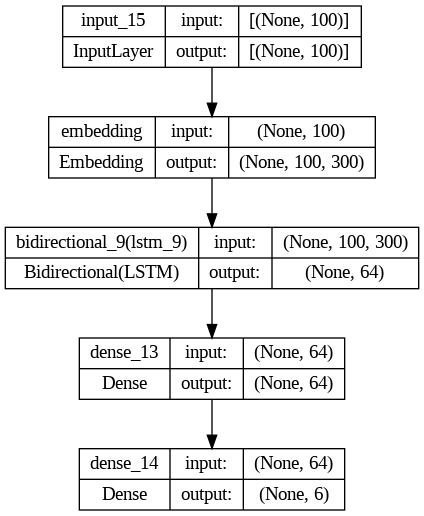

In [96]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [97]:
# Compiling Model using optimizer
# opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_accuracy'), EarlyStopping(patience= 10), ModelCheckpoint(filepath='/content/model-CNN-glove.h5', save_best_only=True)]
#hist_adam = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_val, y_val),callbacks=callbacks)




In [98]:
hist=     model.fit(X_train, y_train,batch_size= 128, epochs=10, verbose=1, validation_data=(X_val, y_val))  

Epoch 1/10
66/66 [==============================] - 86s 1s/step - loss: 0.4573 - acc: 0.9648 - val_loss: 0.4142 - val_acc: 0.8454
Epoch 2/10
66/66 [==============================] - 76s 1s/step - loss: 0.2883 - acc: 0.7828 - val_loss: 0.4343 - val_acc: 0.7808
Epoch 3/10
66/66 [==============================] - 76s 1s/step - loss: 0.2315 - acc: 0.7428 - val_loss: 0.4832 - val_acc: 0.7600
Epoch 4/10
66/66 [==============================] - 76s 1s/step - loss: 0.1923 - acc: 0.7264 - val_loss: 0.5375 - val_acc: 0.7410
Epoch 5/10
66/66 [==============================] - 77s 1s/step - loss: 0.1623 - acc: 0.7060 - val_loss: 0.5924 - val_acc: 0.7154
Epoch 6/10
66/66 [==============================] - 77s 1s/step - loss: 0.1397 - acc: 0.6939 - val_loss: 0.6569 - val_acc: 0.6879
Epoch 7/10
66/66 [==============================] - 79s 1s/step - loss: 0.1192 - acc: 0.6758 - val_loss: 0.6681 - val_acc: 0.7125
Epoch 8/10
66/66 [==============================] - 77s 1s/step - loss: 0.1031 - acc: 0.65

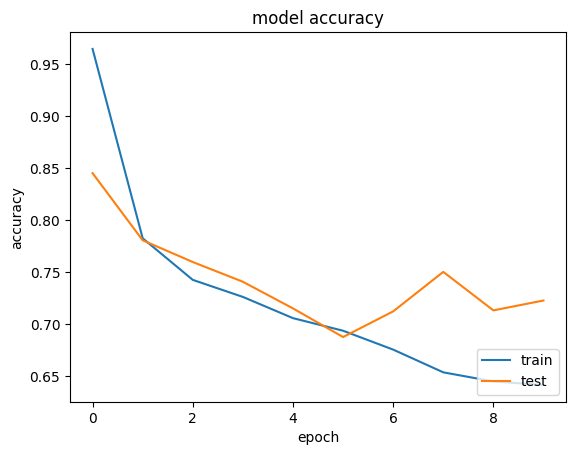

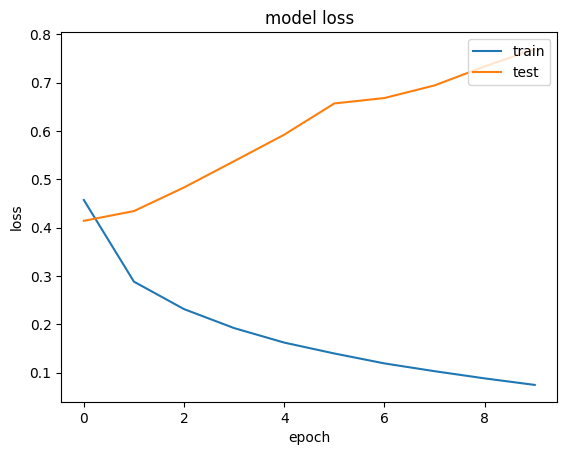

In [99]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

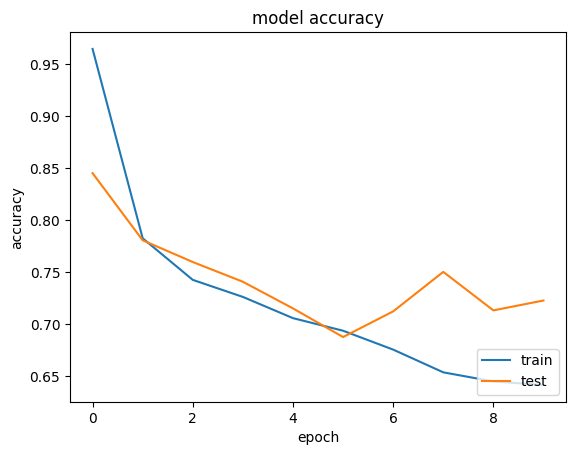

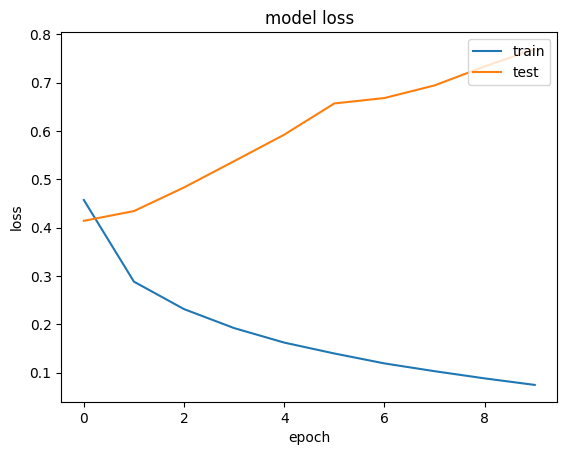

In [100]:
#copy
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [101]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [102]:
# Creating empty prediction array
col = ["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

33/33 [==============================] - 2s 47ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [103]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

from sklearn.metrics import multilabel_confusion_matrix
vis_arr = multilabel_confusion_matrix(y_test, YPred)
vis_arr

from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

<ipython-input-103-6e389be1ca27>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


[0.90513834 0.69648562 0.43209877 0.44897959 0.34536082 0.4516129 ]
[0.94368132 0.64497041 0.44303797 0.32835821 0.29910714 0.30973451]
[0.92400807 0.66973886 0.4375     0.37931034 0.32057416 0.36745407]


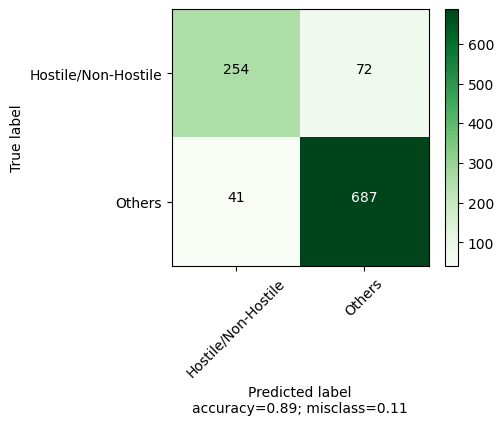

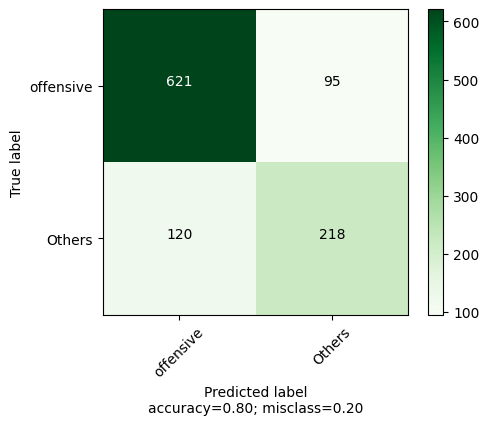

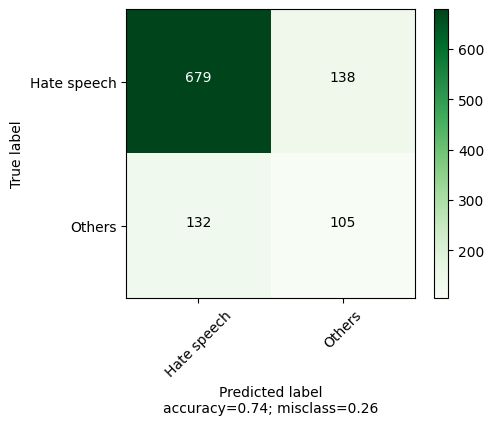

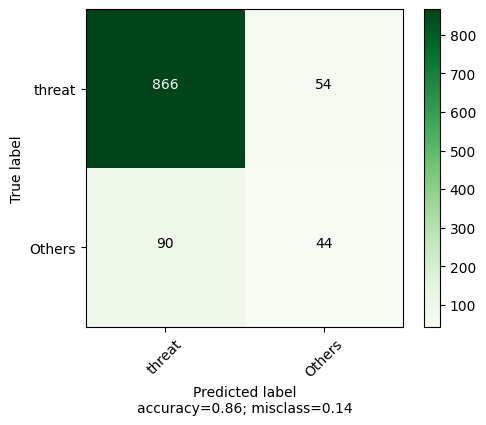

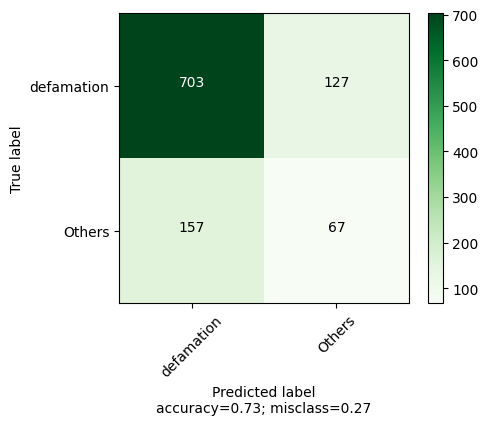

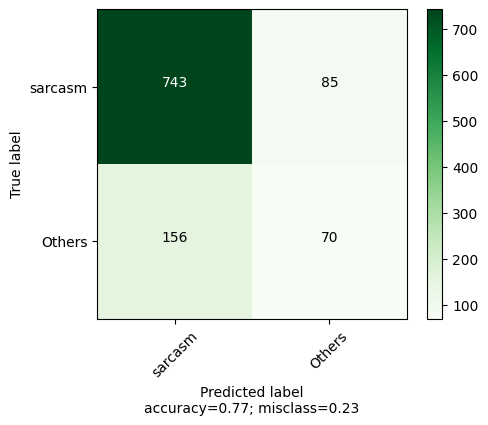

In [104]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()
    
    labels = ["hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]


for i in range(6):
    plot_confusion_matrix(cm=np.array(cm[i]), 
                      normalize    = False,
                      target_names = [labels[i],'Others'],
                      title        = "")

In [105]:
from sklearn.metrics import classification_report
import numpy as np

labels =["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.91      0.94      0.92       728
          offensive       0.70      0.64      0.67       338
        Hate speech       0.43      0.44      0.44       237
             threat       0.45      0.33      0.38       134
         defamation       0.35      0.30      0.32       224
            sarcasm       0.45      0.31      0.37       226

          micro avg       0.68      0.63      0.65      1887
          macro avg       0.55      0.49      0.52      1887
       weighted avg       0.66      0.63      0.64      1887
        samples avg       0.51      0.45      0.45      1887



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**CNN+BILSTM**

In [129]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, concatenate, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Set hyperparameters
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100
FILTERS = 128
KERNEL_SIZE = 5
LSTM_UNITS = 64
DROPOUT_RATE = 0.5
NUM_CLASSES = 6
LEARNING_RATE = 0.001
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Define the inputs
inputs = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)

# Apply the embedding layer to the inputs
embedded_sequences = embedding_layer(inputs)

# Define the CNN layers
conv1 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(embedded_sequences)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(max_pool1)
max_pool2 = MaxPooling1D(pool_size=2)(conv2)

# Flatten the output from the CNN layers
cnn_output = Flatten()(max_pool2)

# Define the BiLSTM layers
lstm = Bidirectional(LSTM(units=LSTM_UNITS, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE))(embedded_sequences)

# Define the output layer
output = Dense(NUM_CLASSES, activation='sigmoid')(concatenate([cnn_output, lstm]))

# Define the model
model = Model(inputs, output)

# Compile the model
optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


66/66 [==============================] - 75s 1s/step - loss: 0.5468 - accuracy: 0.9848 - val_loss: 0.5201 - val_accuracy: 1.0000
Epoch 2/10
66/66 [==============================] - 67s 1s/step - loss: 0.4333 - accuracy: 0.9134 - val_loss: 0.4174 - val_accuracy: 0.8254
Epoch 3/10
66/66 [==============================] - 65s 987ms/step - loss: 0.3334 - accuracy: 0.7974 - val_loss: 0.4294 - val_accuracy: 0.7998
Epoch 4/10
66/66 [==============================] - 67s 1s/step - loss: 0.2799 - accuracy: 0.7558 - val_loss: 0.4730 - val_accuracy: 0.7524
Epoch 5/10
66/66 [==============================] - 66s 998ms/step - loss: 0.2417 - accuracy: 0.7385 - val_loss: 0.5388 - val_accuracy: 0.7685


In [130]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

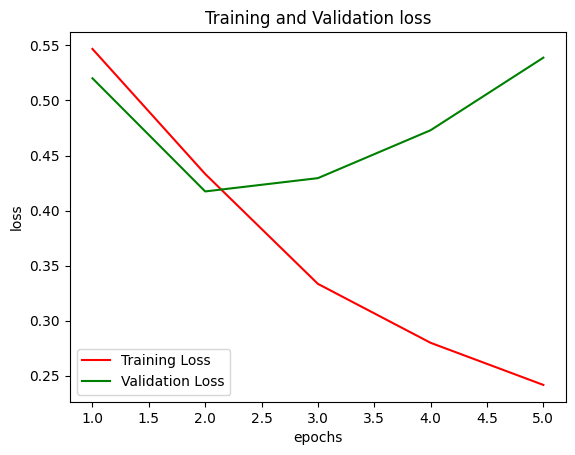

In [131]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

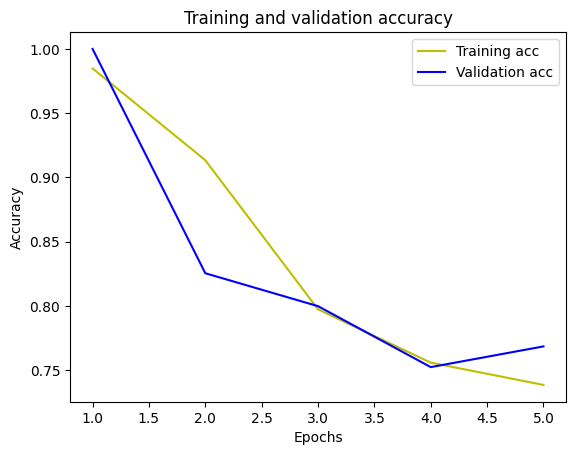

In [132]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [138]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [139]:
# Creating empty prediction array
col = ["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

33/33 [==============================] - 2s 61ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [140]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

<ipython-input-140-0bf6ad0b081c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


array([[1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [141]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.8974026  0.67484663 0.52409639 1.         0.32758621 0.28571429]
[0.94917582 0.65088757 0.36708861 0.00746269 0.16964286 0.02654867]
[0.92256342 0.6626506  0.43176179 0.01481481 0.22352941 0.048583  ]


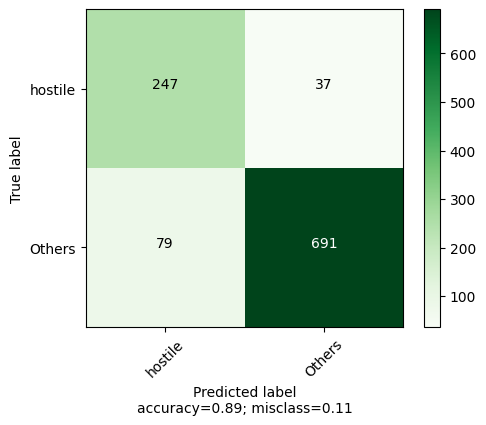

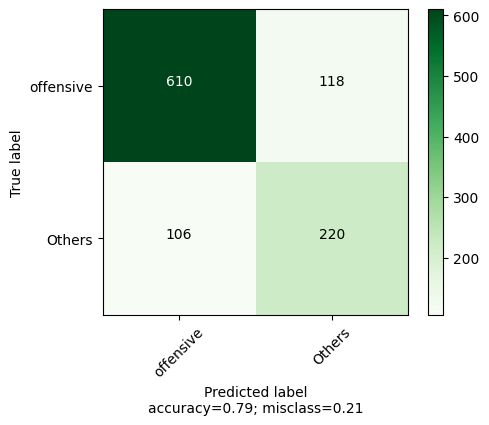

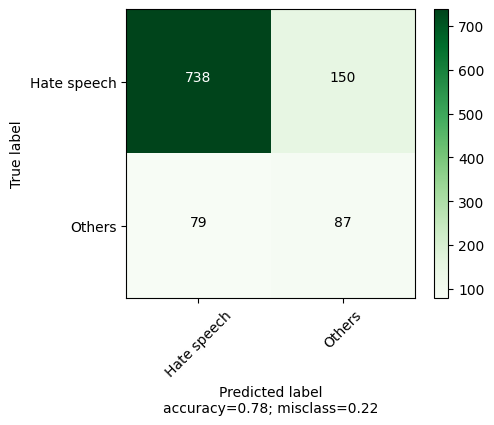

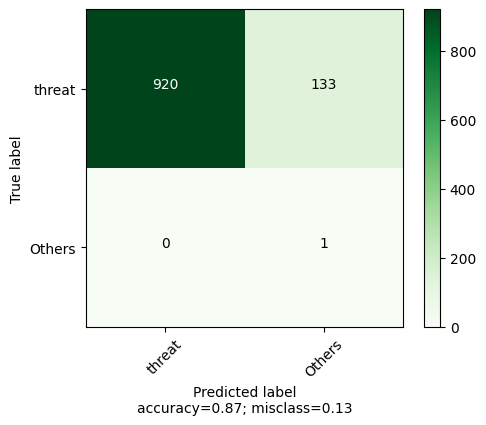

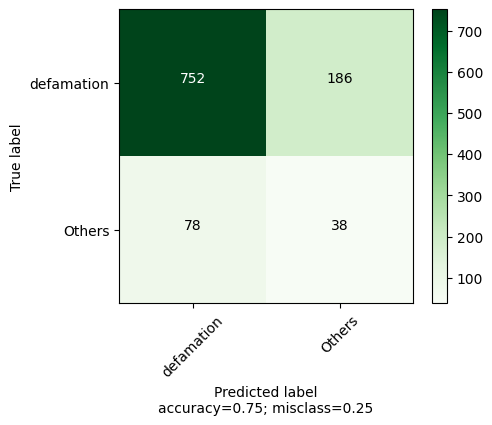

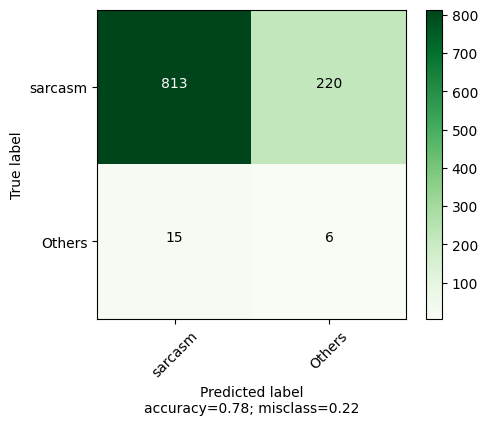

In [143]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix( y_pred,y_test)
cm

import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()
    
labels = ["hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]
for i in range(6):
    plot_confusion_matrix(cm=np.array(cm[i]), 
                      normalize    = False,
                      target_names = [labels[i],'Others'],
                      title        = "")

In [144]:
from sklearn.metrics import classification_report
import numpy as np

labels =["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.90      0.95      0.92       728
          offensive       0.67      0.65      0.66       338
        Hate speech       0.52      0.37      0.43       237
             threat       1.00      0.01      0.01       134
         defamation       0.33      0.17      0.22       224
            sarcasm       0.29      0.03      0.05       226

          micro avg       0.74      0.55      0.63      1887
          macro avg       0.62      0.36      0.38      1887
       weighted avg       0.68      0.55      0.56      1887
        samples avg       0.56      0.39      0.44      1887



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
